_______________
<center>
  <h1 style="font-size: 40px; font-weight: bold">PRODIGY INTERNSHIP</h1>
</center>

______

<center>
  <h1 style="font-size: 30px; font-weight: bold">TASK 5: US TRAFFIC ACCIDENTS</h1>
</center>


* **Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.**

**Intern: Aswathy S**

**Track: Data Science**

**Task Code: PRODIGY_DS_05**
_________

___________
# **LOADING LIBRARIES**
_______

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

___________
# **LOADING DATASET**
___________

In [2]:
df = pd.read_csv(r"C:\Users\admin\Downloads\US_Accidents_March23_sampled_500k.csv")
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A-6077227,Source1,2,2021-12-15 07:30:00,2021-12-15 07:50:30,45.522510,-123.084104,45.520225,-123.084211,0.158,...,False,False,False,False,False,False,Night,Day,Day,Day
499996,A-6323243,Source1,2,2021-12-19 16:25:00,2021-12-19 17:40:37,26.702570,-80.111169,26.703141,-80.111133,0.040,...,False,False,False,False,False,False,Day,Day,Day,Day
499997,A-3789256,Source1,2,2022-04-13 19:28:29,2022-04-13 21:33:44,34.561862,-112.259620,34.566822,-112.267150,0.549,...,False,False,False,False,True,False,Night,Night,Day,Day
499998,A-7030381,Source1,3,2020-05-15 17:20:56,2020-05-15 17:50:56,38.406680,-78.619310,38.406680,-78.619310,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
df.shape

(500000, 46)

In [4]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night


In [5]:
df.tail()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
499995,A-6077227,Source1,2,2021-12-15 07:30:00,2021-12-15 07:50:30,45.522510,-123.084104,45.520225,-123.084211,0.158,...,False,False,False,False,False,False,Night,Day,Day,Day
499996,A-6323243,Source1,2,2021-12-19 16:25:00,2021-12-19 17:40:37,26.702570,-80.111169,26.703141,-80.111133,0.040,...,False,False,False,False,False,False,Day,Day,Day,Day
499997,A-3789256,Source1,2,2022-04-13 19:28:29,2022-04-13 21:33:44,34.561862,-112.259620,34.566822,-112.267150,0.549,...,False,False,False,False,True,False,Night,Night,Day,Day
499998,A-7030381,Source1,3,2020-05-15 17:20:56,2020-05-15 17:50:56,38.406680,-78.619310,38.406680,-78.619310,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
499999,A-5438901,Source1,2,2022-04-02 23:23:13,2022-04-03 00:49:48,35.069358,-85.234410,35.070505,-85.233836,0.086,...,False,False,False,False,False,False,Night,Night,Night,Night


In [6]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

____________
# **DATA PREPROCESSING - DATA CLEANING**
_________

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [8]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,500000.000000,500000.000000,500000.000000,279623.000000,279623.000000,500000.000000,489534.000000,370983.000000,488870.000000,491072.000000,488709.000000,463013.000000,357384.000000
mean,2.212748,36.206421,-94.736583,36.273192,-95.776553,0.564317,61.646254,58.229028,64.834921,29.536621,9.091540,7.681347,0.008289
std,0.486661,5.071411,17.405761,5.265333,18.120211,1.774872,19.000133,22.352246,22.826158,1.008666,2.708083,5.431361,0.101865
min,1.000000,24.562117,-124.497420,24.570110,-124.497419,0.000000,-77.800000,-53.200000,1.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,33.416823,-117.233047,33.474773,-117.778324,0.000000,49.000000,43.000000,48.000000,29.370000,10.000000,4.600000,0.000000
50%,2.000000,35.832147,-87.794365,36.192669,-88.039013,0.029000,64.000000,62.000000,67.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,40.082443,-80.359601,40.181341,-80.252449,0.465000,76.000000,75.000000,84.000000,30.030000,10.000000,10.400000,0.000000
max,4.000000,48.999569,-67.484130,48.998901,-67.484130,193.479996,207.000000,207.000000,100.000000,38.440000,130.000000,822.800000,10.130000


In [9]:
df.dtypes

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [10]:
print("Missing values in each column:\n")
print(df.isnull().sum())

Missing values in each column:

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  220377
End_Lng                  220377
Distance(mi)                  0
Description                   1
Street                      691
City                         19
County                        0
State                         0
Zipcode                     116
Country                       0
Timezone                    507
Airport_Code               1446
Weather_Timestamp          7674
Temperature(F)            10466
Wind_Chill(F)            129017
Humidity(%)               11130
Pressure(in)               8928
Visibility(mi)            11291
Wind_Direction            11197
Wind_Speed(mph)           36987
Precipitation(in)        142616
Weather_Condition         11101
Amenity                       0
Bump    

In [11]:
missing_percentage=df.isnull().sum().sort_values(ascending=False)/len(df)
missing_percentage

End_Lat                  0.440754
End_Lng                  0.440754
Precipitation(in)        0.285232
Wind_Chill(F)            0.258034
Wind_Speed(mph)          0.073974
Visibility(mi)           0.022582
Wind_Direction           0.022394
Humidity(%)              0.022260
Weather_Condition        0.022202
Temperature(F)           0.020932
Pressure(in)             0.017856
Weather_Timestamp        0.015348
Nautical_Twilight        0.002966
Civil_Twilight           0.002966
Sunrise_Sunset           0.002966
Astronomical_Twilight    0.002966
Airport_Code             0.002892
Street                   0.001382
Timezone                 0.001014
Zipcode                  0.000232
City                     0.000038
Description              0.000002
Traffic_Signal           0.000000
Roundabout               0.000000
Station                  0.000000
Stop                     0.000000
Traffic_Calming          0.000000
Country                  0.000000
Turning_Loop             0.000000
No_Exit       

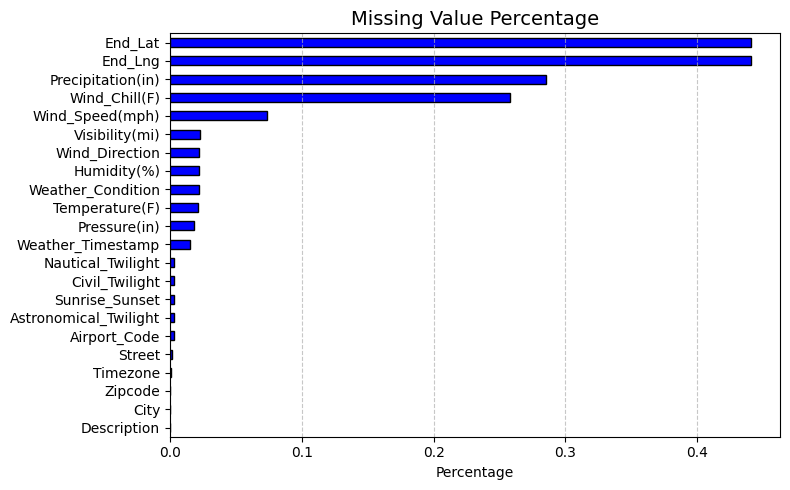

In [12]:
missing_percentage[missing_percentage != 0].sort_values().plot(
    kind='barh',
    color='blue',
    figsize=(8, 5),
    edgecolor='black'
)
plt.title('Missing Value Percentage', fontsize=14)
plt.xlabel('Percentage')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
# Drop columns with excessive missing values or redundancy
df.drop(columns=['End_Lat', 'End_Lng', 'Precipitation(in)', 'Wind_Chill(F)'], inplace=True)

___________
### Categorical Columns
________

In [14]:
# Impute missing values in important weather-related columns
df['Temperature(F)'].fillna(df['Temperature(F)'].median(), inplace=True)
df['Humidity(%)'].fillna(df['Humidity(%)'].median(), inplace=True)
df['Pressure(in)'].fillna(df['Pressure(in)'].median(), inplace=True)
df['Visibility(mi)'].fillna(df['Visibility(mi)'].median(), inplace=True)
df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].median(), inplace=True)

In [15]:
# Impute categorical variables with mode
df['Weather_Condition'].fillna(df['Weather_Condition'].mode()[0], inplace=True)
df['Wind_Direction'].fillna(df['Wind_Direction'].mode()[0], inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)
df['Street'].fillna(df['Street'].mode()[0], inplace=True)
df['Timezone'].fillna(df['Timezone'].mode()[0], inplace=True)
df['Zipcode'].fillna(df['Zipcode'].mode()[0], inplace=True)
df['Airport_Code'].fillna(df['Airport_Code'].mode()[0], inplace=True)
df['Weather_Timestamp'].fillna(method='ffill', inplace=True)

In [16]:
# Impute twilight and sun condition columns with mode
twilight_cols = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
for col in twilight_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [17]:
# Drop the 1 row with missing Description
df.dropna(subset=['Description'], inplace=True)

In [18]:
# Final check on missing values
missing_after = df.isnull().sum().sort_values(ascending=False)
missing_after

ID                       0
Railway                  0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Roundabout               0
Source                   0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Wind_Direction           0
Visibility(mi)           0
Pressure(in)             0
Humidity(%)              0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
T

In [19]:
print("Duplicate values:")
print(df.duplicated().sum())

Duplicate values:
0


### Numerical columns

In [20]:
# Ensure Severity is in numerical_columns and remove it
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

# Check if 'Severity' is in the list, and remove it if present
if 'Severity' in numerical_features:
    numerical_features.remove('Severity')

# Display the resulting list to confirm
print("Numerical columns (excluding Severity):")
print(numerical_features)

Numerical columns (excluding Severity):
['Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']


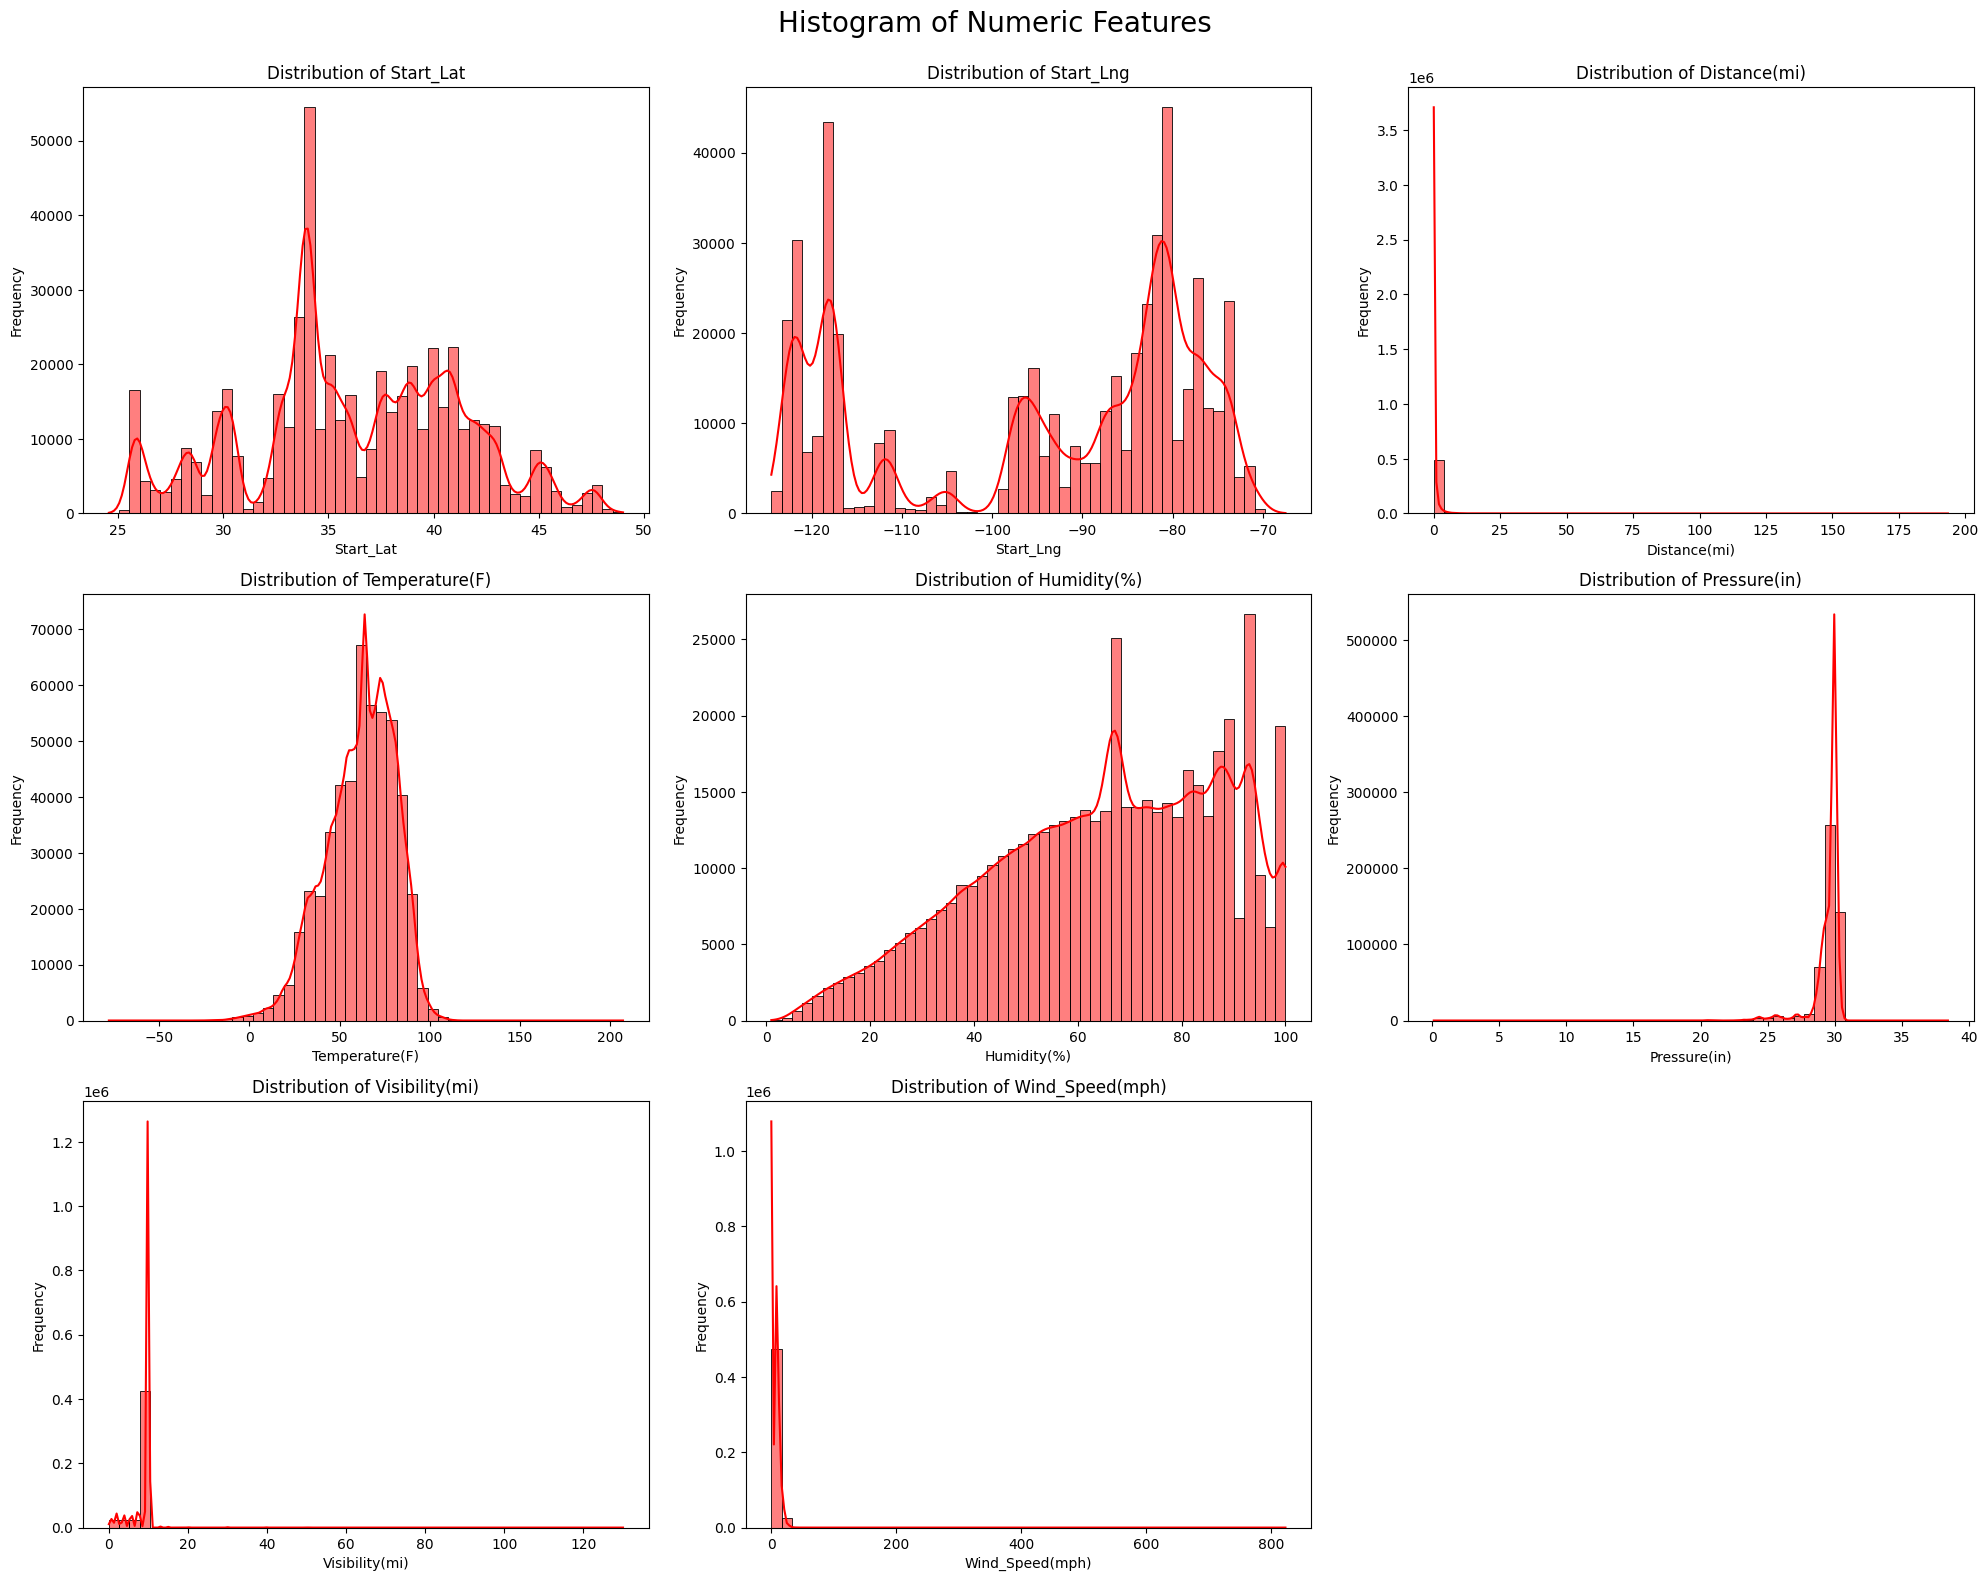

In [21]:
# Histogram plot

plt.figure(figsize=(20, 20))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=df, x=col, kde=True, bins=50, color='red')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle("Histogram of Numeric Features", fontsize=20, y=1.02)
plt.show()

_______
## Outlier and Skewness Handling
_______

In [22]:
skewness = df[numerical_features].skew().sort_values(ascending=True)
print("Skewness before outlier removal or transformation:")
print(skewness)

Skewness before outlier removal or transformation:
Pressure(in)       -3.781791
Temperature(F)     -0.526201
Start_Lng          -0.479194
Humidity(%)        -0.407017
Start_Lat          -0.073975
Visibility(mi)      2.719741
Wind_Speed(mph)     8.784559
Distance(mi)       17.150022
dtype: float64


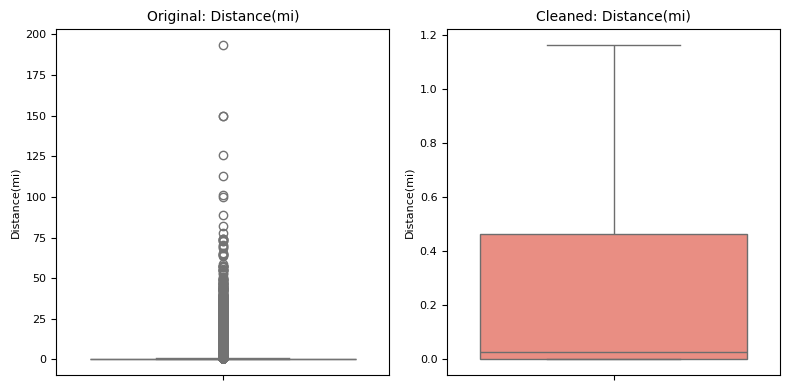

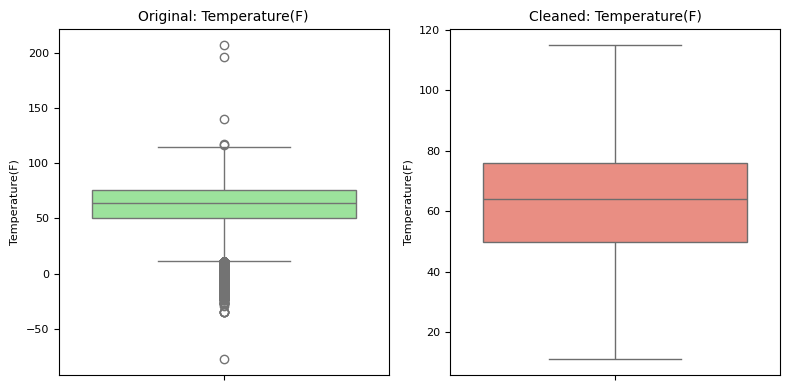

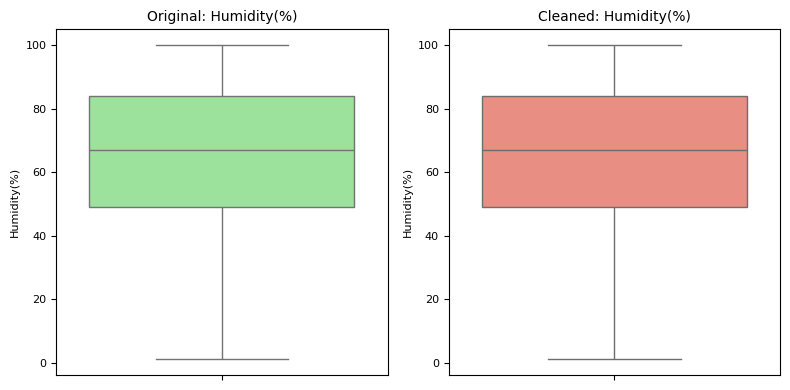

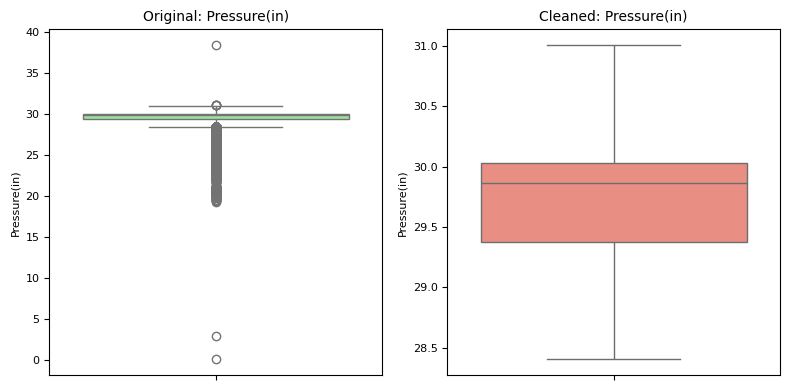

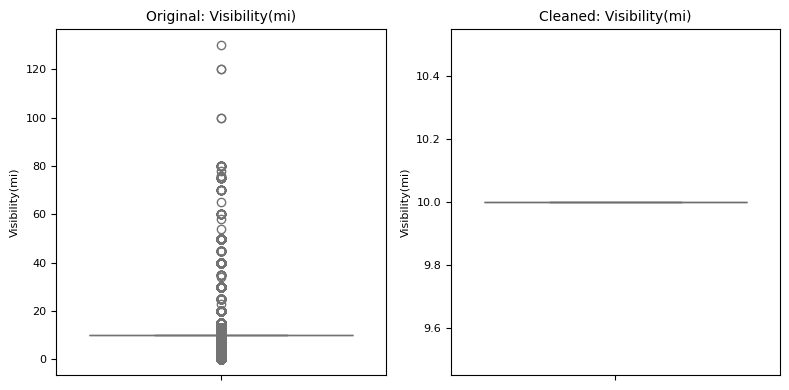

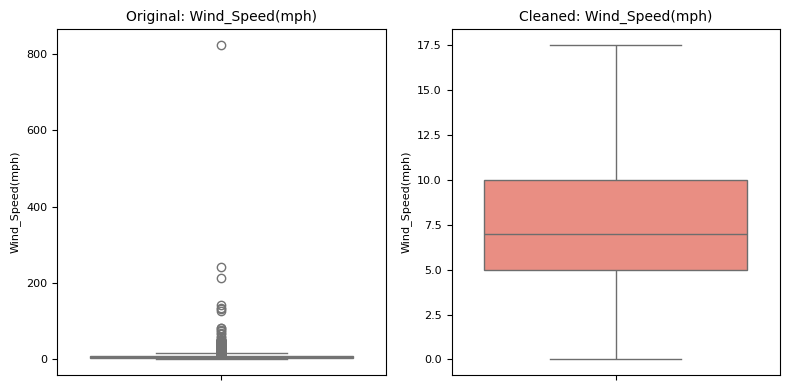

Dataset shape after being outliers removed: (499999, 42)
Dataset shape before being outliers removed: (499999, 42)


In [23]:
# Define features for which you want to remove outliers
features = ['Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

df_clipped = df.copy()

for feature in features:
    # Calculate Q1, Q3, and IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Clip outliers
    df_clipped[feature] = df[feature].clip(lower=lower, upper=upper)

    
    # Create a box plot for the original data
    plt.figure(figsize=(8, 4))  # Smaller figure size
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[feature], color='lightgreen')
    plt.title(f'Original: {feature}', fontsize=10)  # Smaller title font
    plt.ylabel(feature, fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Create a box plot for the cleaned data
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_clipped[feature], color='salmon')
    plt.title(f'Cleaned: {feature}', fontsize=10)  # Smaller title font
    plt.ylabel(feature, fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Show plots
    plt.tight_layout()
    plt.show()

print("Dataset shape after being outliers removed:",df_clipped.shape)
print("Dataset shape before being outliers removed:",df.shape)

### Outlier Handling Not Needed:

* **Severity** does not require outlier handling because it is a discrete ordinal variable (ranging from 1 to 4), not a continuous numeric feature.

* **Start_Lat** and **Start_Lng** should not have outliers removed because they represent geolocation data where every point, even if spatially distant, contributes to accurate hotspot mapping.

In [24]:
skewness = df_clipped[numerical_features].skew().sort_values(ascending=True)
print("Skewness after outlier removal or transformation:")
print(skewness)

Skewness after outlier removal or transformation:
Pressure(in)      -1.035553
Start_Lng         -0.479194
Temperature(F)    -0.441009
Humidity(%)       -0.407017
Start_Lat         -0.073975
Visibility(mi)     0.000000
Wind_Speed(mph)    0.314858
Distance(mi)       1.237244
dtype: float64


In [25]:
# Highlight the features with high skewness (greater than 0.5 or less than -0.5)
highly_skewed = skewness[(skewness > 0.5) | (skewness < -0.5)]
print("\nHighly skewed features:")
print(highly_skewed)
print(len(highly_skewed))


Highly skewed features:
Pressure(in)   -1.035553
Distance(mi)    1.237244
dtype: float64
2


______
### Transformation using log
______

In [26]:
# List of features to transform
highly_skewed_features = ['Distance(mi)','Pressure(in)']

# Make a copy to preserve original dataset
df_transformed = df_clipped.copy()

# Apply log transformation directly on the original columns
for col in highly_skewed_features:
    min_val = df_transformed[col].min()
    if min_val <= 0:
        shift = abs(min_val) + 0.01  # Avoid log(0)
        df_transformed[col] = np.log(df_transformed[col] + shift)
    else:
        df_transformed[col] = np.log(df_transformed[col])

In [27]:
# Compute skewness
skewness_after = df_transformed[highly_skewed_features].skew()

# Display sorted skewness
print("Skewness After Transformation (sorted):\n")
print(skewness_after.sort_values(ascending=False))

Skewness After Transformation (sorted):

Distance(mi)    0.331326
Pressure(in)   -1.066331
dtype: float64


In [28]:
# List of datetime columns
datetime_cols = ['Start_Time', 'End_Time', 'Weather_Timestamp']

# Convert to datetime format, handling errors
for col in datetime_cols:
    df_transformed[col] = pd.to_datetime(df_transformed[col], errors='coerce')


df_transformed[datetime_cols].dtypes

Start_Time           datetime64[ns]
End_Time             datetime64[ns]
Weather_Timestamp    datetime64[ns]
dtype: object

In [29]:
df_transformed[datetime_cols].head()

,Start_Time,End_Time,Weather_Timestamp
0,2019-06-12 10:10:56,2019-06-12 10:55:58,2019-06-12 09:53:00
1,NaT,NaT,2022-12-03 23:52:00
2,NaT,NaT,2022-08-20 12:56:00
3,2022-02-21 17:43:04,2022-02-21 19:43:23,2022-02-21 17:35:00
4,2020-12-04 01:46:00,2020-12-04 04:13:09,2020-12-04 01:54:00


In [30]:
# Extract time components
df_transformed['Hour'] = df_transformed['Start_Time'].dt.hour
df_transformed['Weekday'] = df_transformed['Start_Time'].dt.day_name()
df_transformed['Month'] = df_transformed['Start_Time'].dt.month_name()
df_transformed['Year'] = df_transformed['Start_Time'].dt.year

# Is Weekend
df_transformed['Is_Weekend'] = df_transformed['Weekday'].isin(['Saturday', 'Sunday'])

# Is Night (8 PM to 6 AM)
df_transformed['Is_Night'] = df_transformed['Hour'].apply(lambda x: x >= 20 or x < 6)

# Is Rush Hour (7-9 AM or 4-7 PM)
df_transformed['Is_Rush_Hour'] = df_transformed['Hour'].apply(lambda x: (7 <= x <= 9) or (16 <= x <= 19))

________
# EXPLORATORY DATA ANALYSIS - VISUALIZATION
___________

#  1. Accidents by Hour of Day
______________

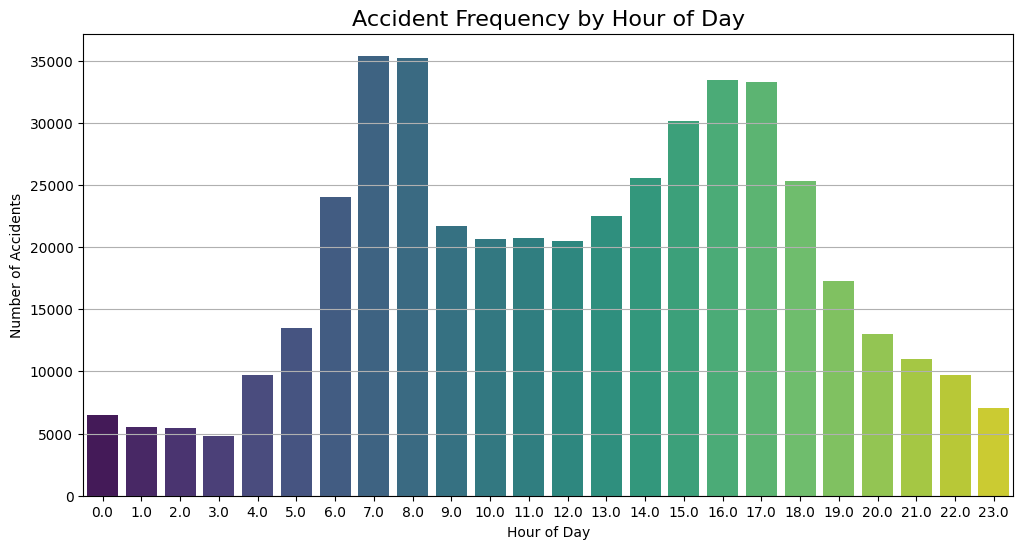

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_transformed, x='Hour', palette='viridis')
plt.title('Accident Frequency by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()

__________
## Insights
 
**1) Morning Peak (7–8 AM):**

* The highest number of accidents occurs around 7:00–8:00 AM, with counts exceeding 35,000 accidents.

* This likely corresponds to morning rush hour traffic when people are commuting to work or school.

**2) Evening Peak (4–6 PM):**

* A secondary high-accident window appears between 3:00–6:00 PM, peaking around 4:00–5:00 PM with over 33,000 accidents.

* This aligns with evening rush hour.

**3) Midday Stability (10 AM–2 PM):**

* Accident frequency is relatively stable and moderate during 10:00 AM–2:00 PM, staying around 20,000–22,000 accidents.

* Indicates a steady flow of traffic but not as congested as rush hours.

**4) Low Accident Periods (Midnight–5 AM):**

* The lowest accident counts occur between 12:00 midnight and 4:00 AM, with counts under 7,000 accidents.

* Traffic is sparse at these hours, leading to fewer accidents.

**5) Evening Decline (7 PM onwards):**

* After 7 PM, accident frequency steadily declines, reaching about 7,000–10,000 accidents by late evening (10 PM–11 PM).

### Key Takeaways

* **Critical accident hours:** Morning (7–8 AM) and Evening (4–6 PM).

* **Off-peak safer hours:** Late night to early morning (12–5 AM).

* **Patterns match commuting behavior:** Rush hours are most hazardous.
____________                                                       

# 2. Accidents by Weekday
___________

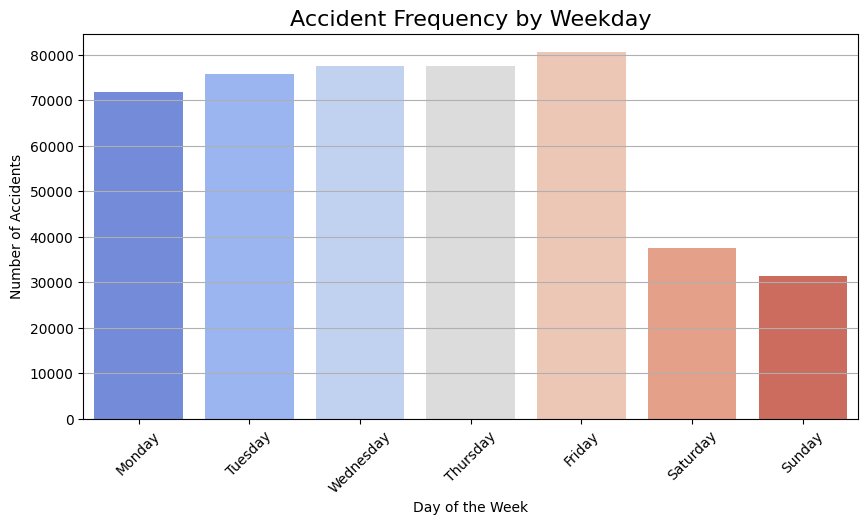

In [32]:
from pandas.api.types import CategoricalDtype

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_dtype = CategoricalDtype(categories=ordered_days, ordered=True)
df_transformed['Weekday'] = df_transformed['Weekday'].astype(cat_dtype)

plt.figure(figsize=(10, 5))
sns.countplot(data=df_transformed, x='Weekday', palette='coolwarm')
plt.title('Accident Frequency by Weekday', fontsize=16)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

_________
## Insights

**1) Weekdays have much higher accident counts than weekends.**

* Monday to Friday all have 70,000–80,000 accidents each, which is significantly higher than Saturday and Sunday.

**2) Friday is the most accident-prone day.**

* With over 80,000 accidents, Friday stands out as the peak day.

* This could be due to increased travel at the end of the workweek or evening outings.

**3) Tuesday, Wednesday, and Thursday are also high-risk.**

* Accident numbers remain consistently high (around 75,000–78,000).

**4) Monday is slightly lower than mid-week days.**

* Still high (around 72,000), but not as high as Friday.

**5) Saturday and Sunday show a significant drop.**

* **Saturday:** ~37,000 accidents.

* **Sunday:** ~31,000 accidents.

* Fewer accidents likely because of reduced commuting traffic.

## Key Takeaways

* **High-risk days:**  Monday–Friday (especially Friday).

* **Low-risk days:** Saturday and Sunday.

* **Possible reasons:** Weekday work commutes, heavier traffic volume, and Friday’s increased travel/social activities.
____________

# 3. Accidents by Weather Condition 
_______________

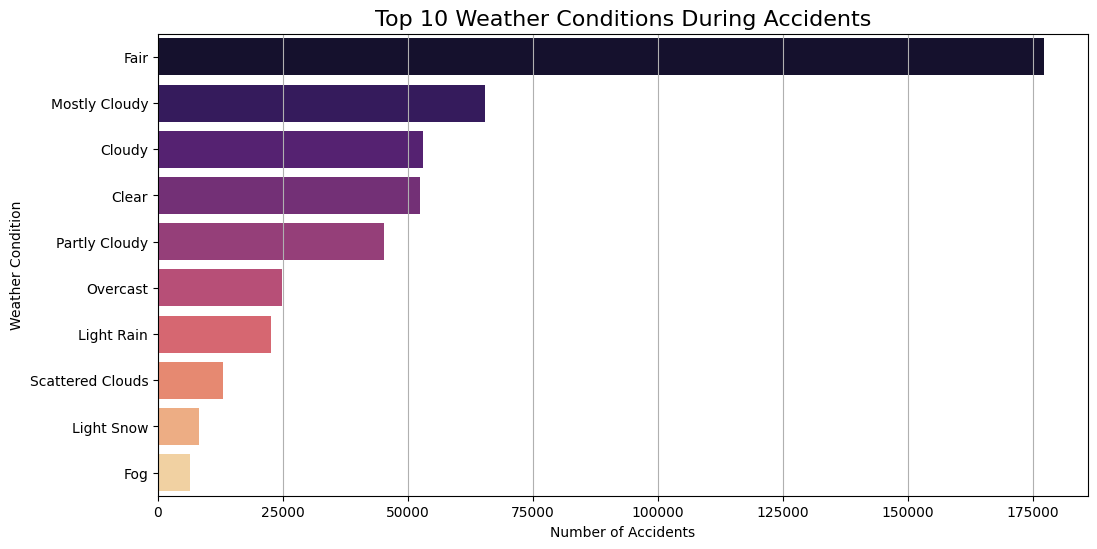

In [33]:
top_weather = df_transformed['Weather_Condition'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(data=df_transformed[df_transformed['Weather_Condition'].isin(top_weather)], 
              y='Weather_Condition', order=top_weather, palette='magma')
plt.title('Top 10 Weather Conditions During Accidents', fontsize=16)
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.grid(axis='x')
plt.show()


______
## Insights

**1) Most accidents happen in fair weather.**

* ‘Fair’ weather condition has the highest count with over 180,000 accidents.

* This indicates that good weather does not necessarily reduce accidents, likely because there is more traffic volume in fair conditions.

**2) Cloudy conditions contribute significantly.**

* Mostly Cloudy, Cloudy, Clear, and Partly Cloudy each record between 40,000 and 70,000 accidents.

* Even without severe weather, accidents are frequent.

**3) Overcast and light rain also show notable accident counts.**

* Overcast is around 30,000 accidents.

* Light Rain is slightly less than overcast, around 25,000 accidents.

* These conditions may reduce visibility or road traction.

**4) Severe weather conditions contribute less overall.**

* Scattered Clouds, Light Snow, and Fog each have accident counts below 20,000.

* This may be because fewer people drive in these conditions or they drive more cautiously.

## Key Takeaways:

* High accident counts are observed in fair and commonly occurring weather conditions, likely due to high traffic volumes.

* Cloudy and overcast conditions also carry considerable risk.

* Severe conditions show fewer accidents overall, though they may pose a higher risk per trip.
___________

# 4. Day vs Night Accidents
_____________

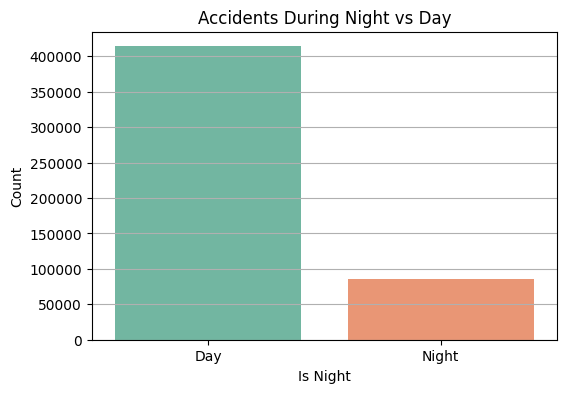

In [34]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_transformed, x='Is_Night', palette='Set2')
plt.title('Accidents During Night vs Day')
plt.xlabel('Is Night')
plt.ylabel('Count')
plt.xticks([0, 1], ['Day', 'Night'])
plt.grid(axis='y')
plt.show()

______
## Insights

**1) Accidents are far more frequent during the day.**

* Daytime accidents exceed 400,000, which is significantly higher than nighttime.

**2) Nighttime accidents are comparatively fewer.**

* Nighttime accidents are around 90,000, much lower than daytime.

**3) Possible reasons for the difference:**

* Daytime has higher traffic volume because of commuting, business hours, and general movement.

* Nighttime has less traffic, leading to fewer accidents overall, although nighttime accidents can sometimes be more severe due to reduced visibility and fatigue.

## Key takeaway:

* Most accidents occur during the day, likely because of the increased number of vehicles on the road compared to nighttime.
_____

# 5. Accidents Severity 
__________

In [35]:
severity_counts = df_transformed['Severity'].value_counts()
severity_counts

Severity
2    398142
3     84519
4     13064
1      4274
Name: count, dtype: int64

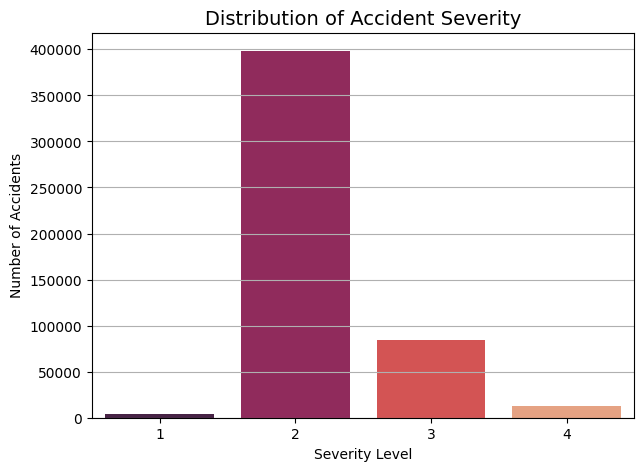

In [36]:
# Plot
plt.figure(figsize=(7, 5))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='rocket')
plt.title('Distribution of Accident Severity', fontsize=14)
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.grid(axis='y')
plt.show()

________
### What It Shows:
Severity = 1: Least severe

Severity = 4: Most severe
You'll likely observe that lower severity (1 or 2) occurs more frequently than severe accidents.
__________

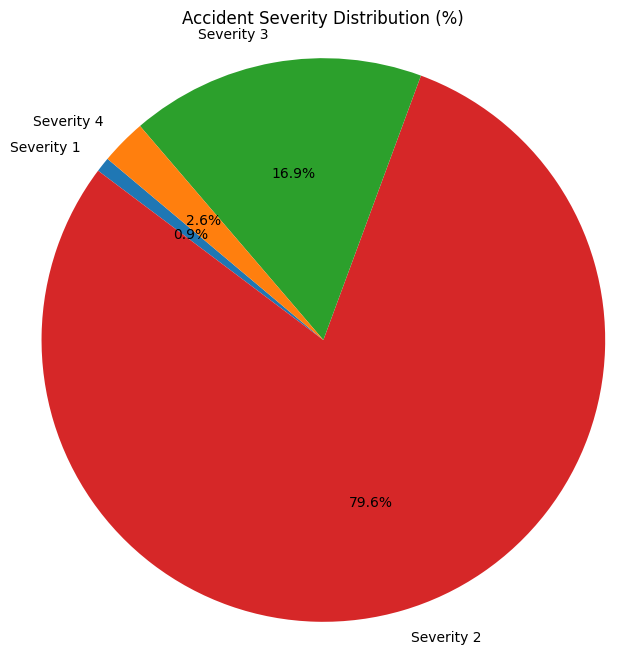

In [37]:
# Count of each severity level
severity_counts = df_transformed['Severity'].value_counts().sort_index()

# Labels and percentage
labels = [f'Severity {i}' for i in severity_counts.index]
colors = ['#1f77b4', '#d62728', '#2ca02c', '#ff7f0e']

# Plot
plt.figure(figsize=(8, 8))
plt.pie(severity_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Accident Severity Distribution (%)')
plt.axis('equal')  # Makes the pie circular
plt.show()

### What It Shows:

* Severity 1 = Least severe (e.g., minor accidents)

* Severity 4 = Most severe (e.g., major crashes, injuries/fatalities)

____________
# 1. Severity vs Day/Night
______

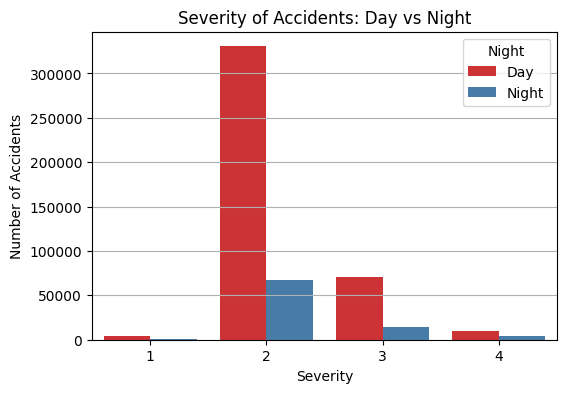

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_transformed, x='Severity', hue='Is_Night', palette='Set1')
plt.title('Severity of Accidents: Day vs Night')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.legend(title='Night', labels=['Day', 'Night'])
plt.grid(axis='y')
plt.show()

___________
## Insights

**1) Severity level 2 dominates for both day and night.**

* The majority of accidents fall under Severity 2.

* Daytime accidents at this level are far higher (over 320,000) compared to nighttime (around 65,000).

**2) Severity level 3 also shows a notable count.**

* Daytime accidents at Severity 3 are significantly higher than nighttime, but the nighttime count is still noticeable compared to other levels.

**3) Severity level 1 has very few accidents overall.**

* Both day and night show minimal accidents at this level.

**4) Severity level 4 (most severe) is relatively low but present.**

* Daytime accidents are slightly higher than nighttime, though both are under 15,000.

**5) Day vs Night comparison:**

* Across all severity levels, daytime accidents far exceed nighttime accidents, which is consistent with the higher traffic volume during the day.

## Key takeaway:

* Most accidents are of moderate severity (level 2), and the overall frequency is much higher during the day across all severity levels.

__________
# 2. Severity vs Weekday/Weekend
_____________

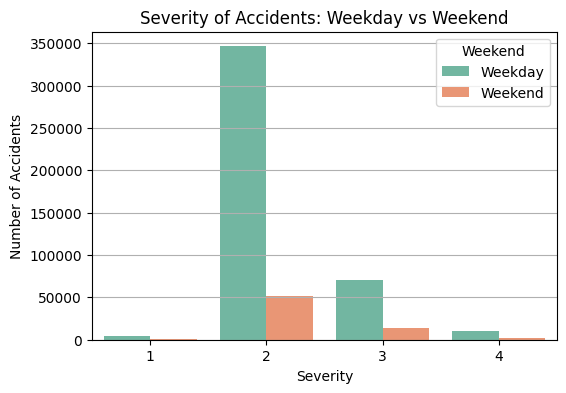

In [39]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_transformed, x='Severity', hue='Is_Weekend', palette='Set2')
plt.title('Severity of Accidents: Weekday vs Weekend')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.legend(title='Weekend', labels=['Weekday', 'Weekend'])
plt.grid(axis='y')
plt.show()

_____
## Insights

**1) Severity level 2 dominates for both weekday and weekend.**

* Weekday accidents at severity 2 are the highest, with counts around 340,000.

* Weekend accidents at severity 2 are much lower, around 50,000.

**2) Severity level 3 shows a notable difference.**

* Weekdays have about 70,000 severity‑3 accidents.

* Weekends have around 15,000 severity‑3 accidents.

**3) Severity level 4 (most severe) is relatively low.**

* Weekdays have slightly above 10,000 accidents.

* Weekends have very few, well below weekday levels.

**4) Severity level 1 is minimal for both categories.**

* Very few accidents occur at this level on both weekdays and weekends.

**5) Overall comparison:**

* Weekdays consistently have a much higher number of accidents across all severity levels compared to weekends.

* This pattern aligns with heavier traffic volumes and commuting patterns on weekdays.

## Key takeaway:

* Accidents of all severity levels are far more frequent on weekdays than weekends, with severity level 2 being the most common overall.
__________

In [40]:

def plot_severity_distribution(
    df_transformed, 
    group_by_column, 
    figsize=(12, 8), 
    top_n=None, 
    percent=True, 
    sort_by_severity_4=False
):
    # Group and count
    grouped = df_transformed.groupby([group_by_column, 'Severity']).size().reset_index(name='Counts')
    grouped['Total'] = grouped.groupby(group_by_column)['Counts'].transform('sum')
    grouped['Percentage'] = (grouped['Counts'] / grouped['Total']) * 100

    # Limit to top N groups
    if top_n:
        top_groups = grouped.groupby(group_by_column)['Counts'].sum().nlargest(top_n).index
        grouped = grouped[grouped[group_by_column].isin(top_groups)]

    # Choose metric
    value_field = 'Percentage' if percent else 'Counts'
    pivot_df = grouped.pivot(index=group_by_column, columns='Severity', values=value_field).fillna(0)

    # Sort
    if sort_by_severity_4 and 4 in pivot_df.columns:
        pivot_df = pivot_df.sort_values(by=4, ascending=False)
    else:
        pivot_df['Total'] = pivot_df.sum(axis=1)
        pivot_df = pivot_df.sort_values(by='Total', ascending=False).drop(columns='Total')

    # Plot
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=figsize, colormap='viridis', width=0.85)

    # Format y-axis
    if percent:
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}%"))
        plt.ylabel('Percentage of Cases', fontsize=12)
    else:
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
        plt.ylabel('Number of Cases', fontsize=12)

    plt.title(f"{'Percentage' if percent else 'Count'} Distribution of Severity by {group_by_column}", fontsize=16)
    plt.xlabel(group_by_column, fontsize=12)
    plt.xticks(rotation=90, fontsize=9)
    plt.legend(title='Severity', fontsize=10)
    plt.tight_layout()
    plt.show()

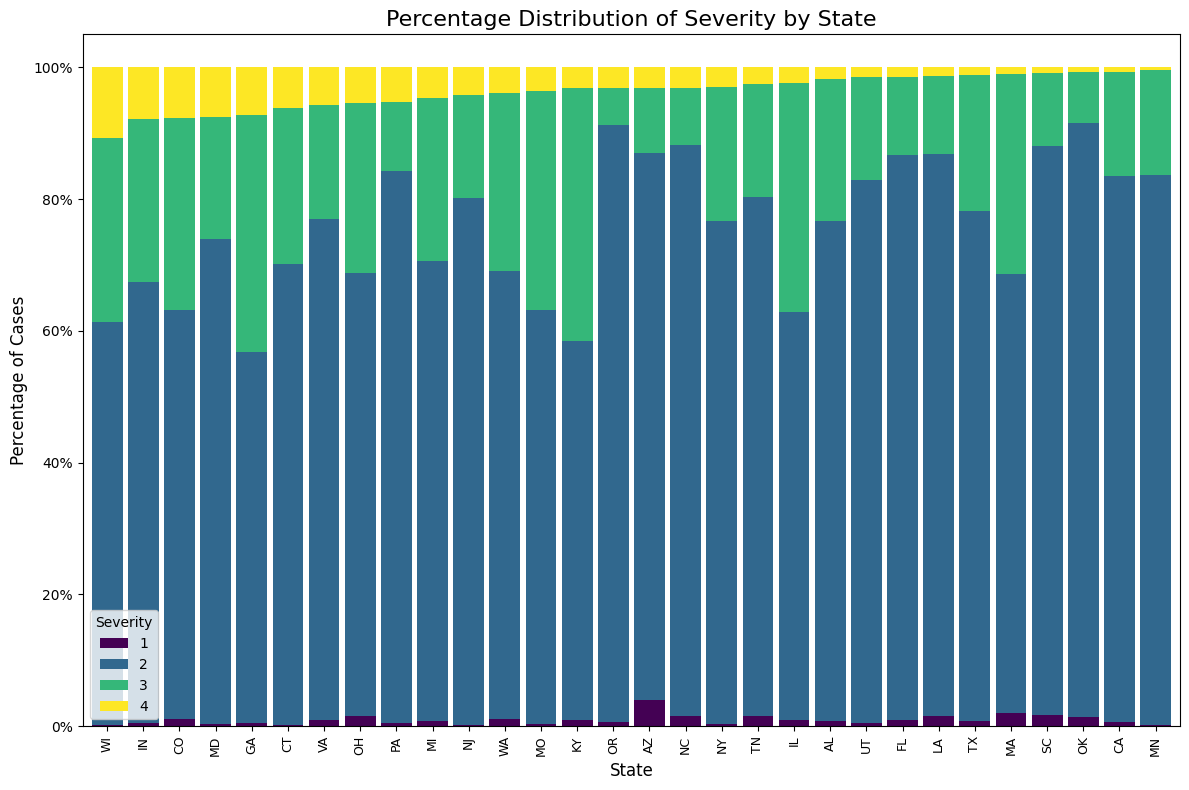

In [41]:
plot_severity_distribution(df_transformed, group_by_column='State', top_n=30, percent=True, sort_by_severity_4=True)


--- Plotting: Street ---



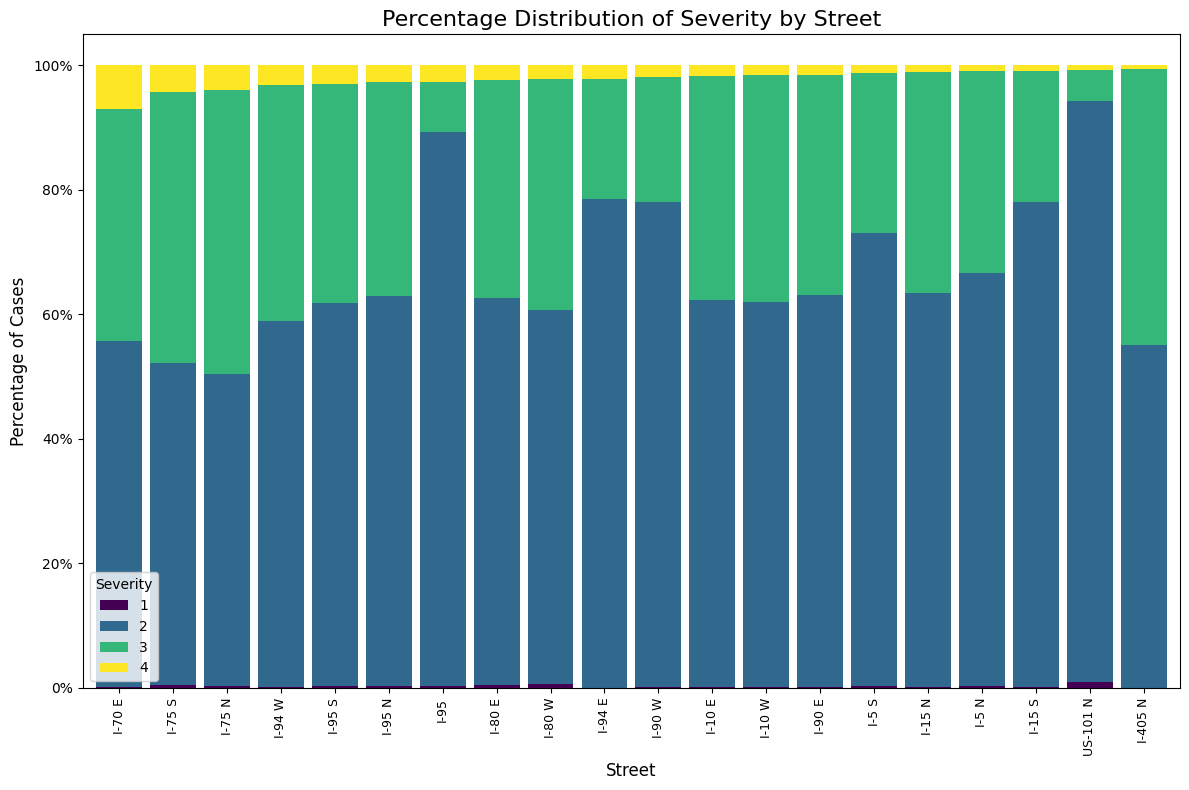


--- Plotting: City ---



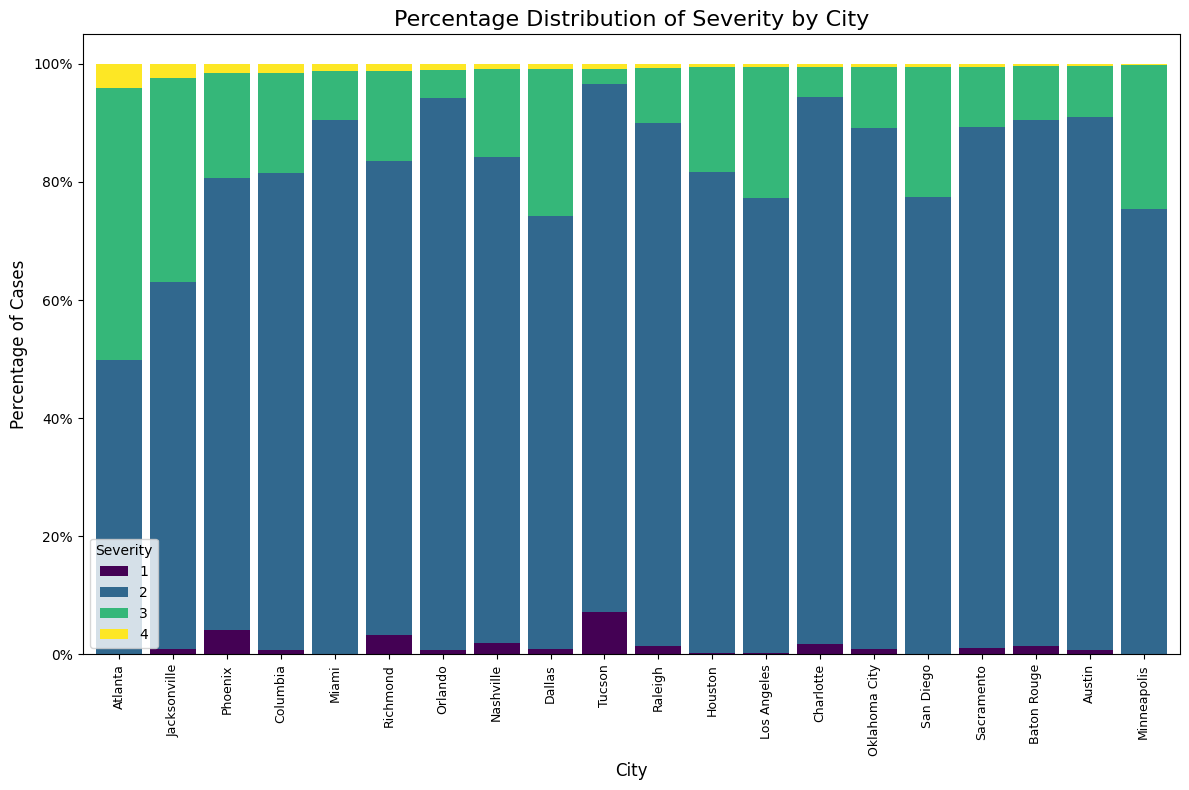


--- Plotting: County ---



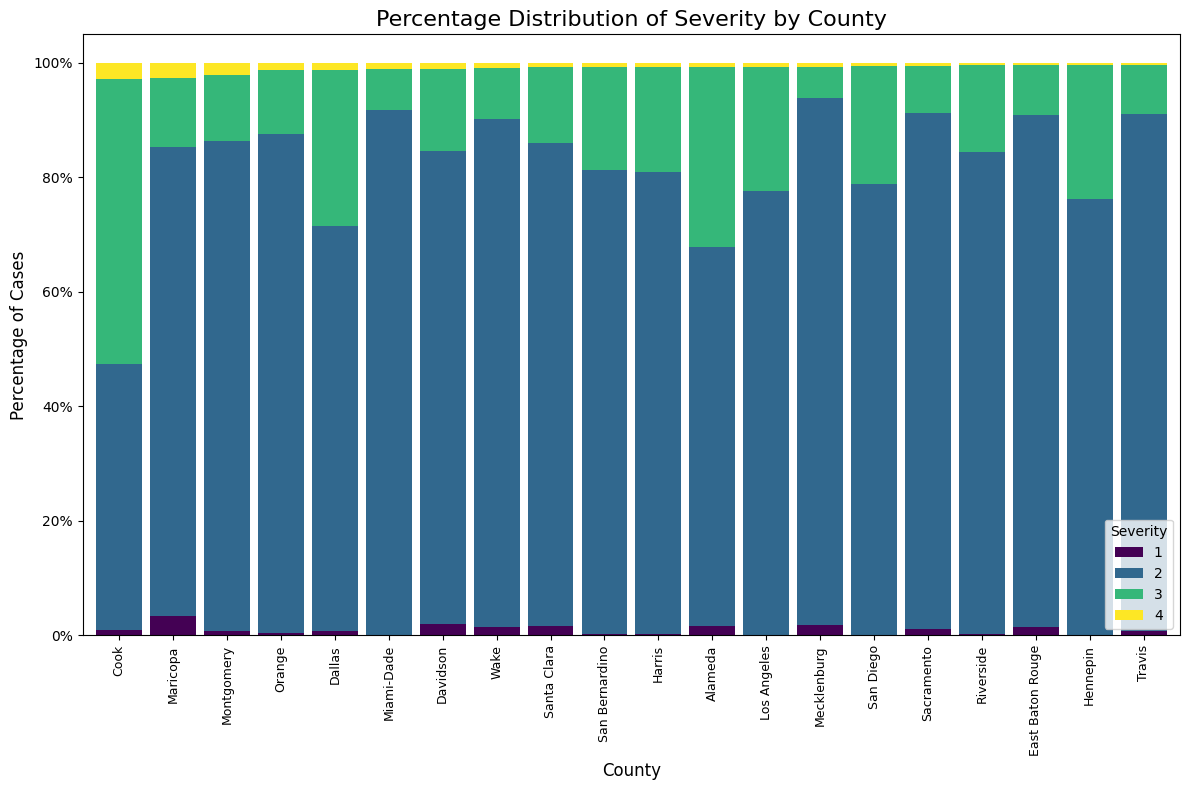


--- Plotting: State ---



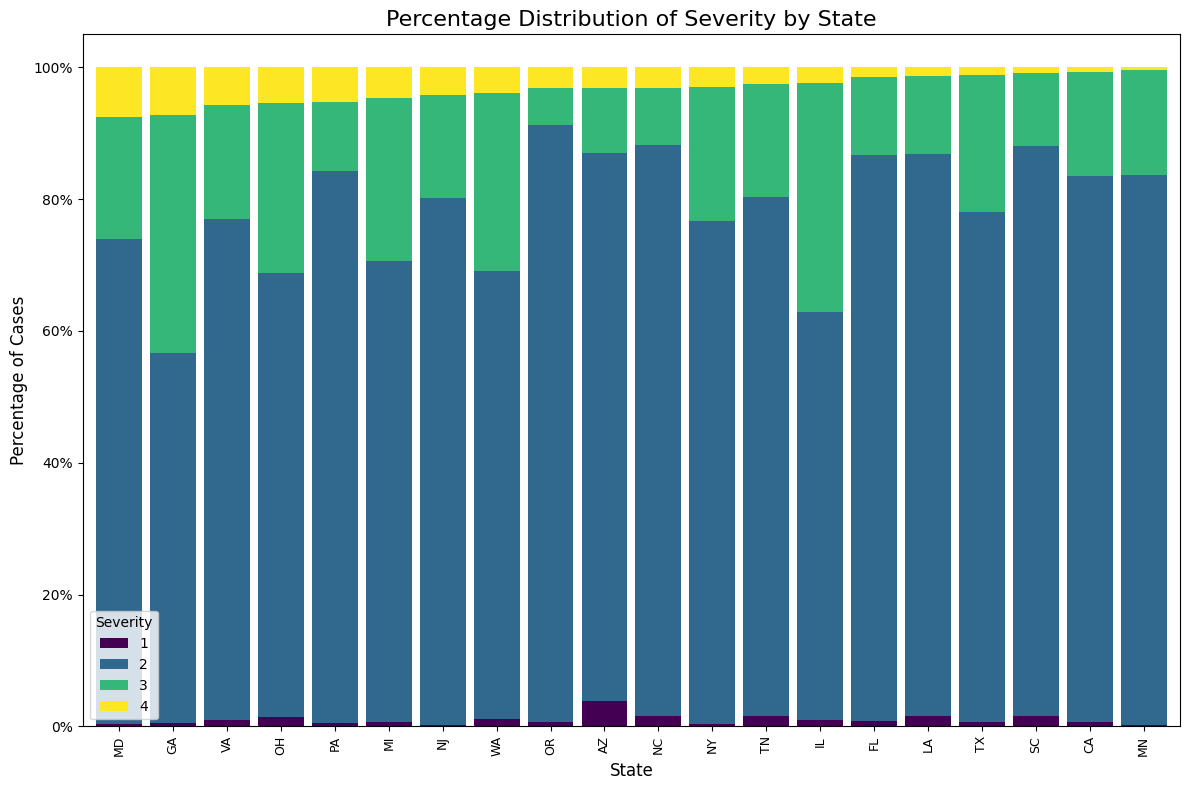


--- Plotting: Timezone ---



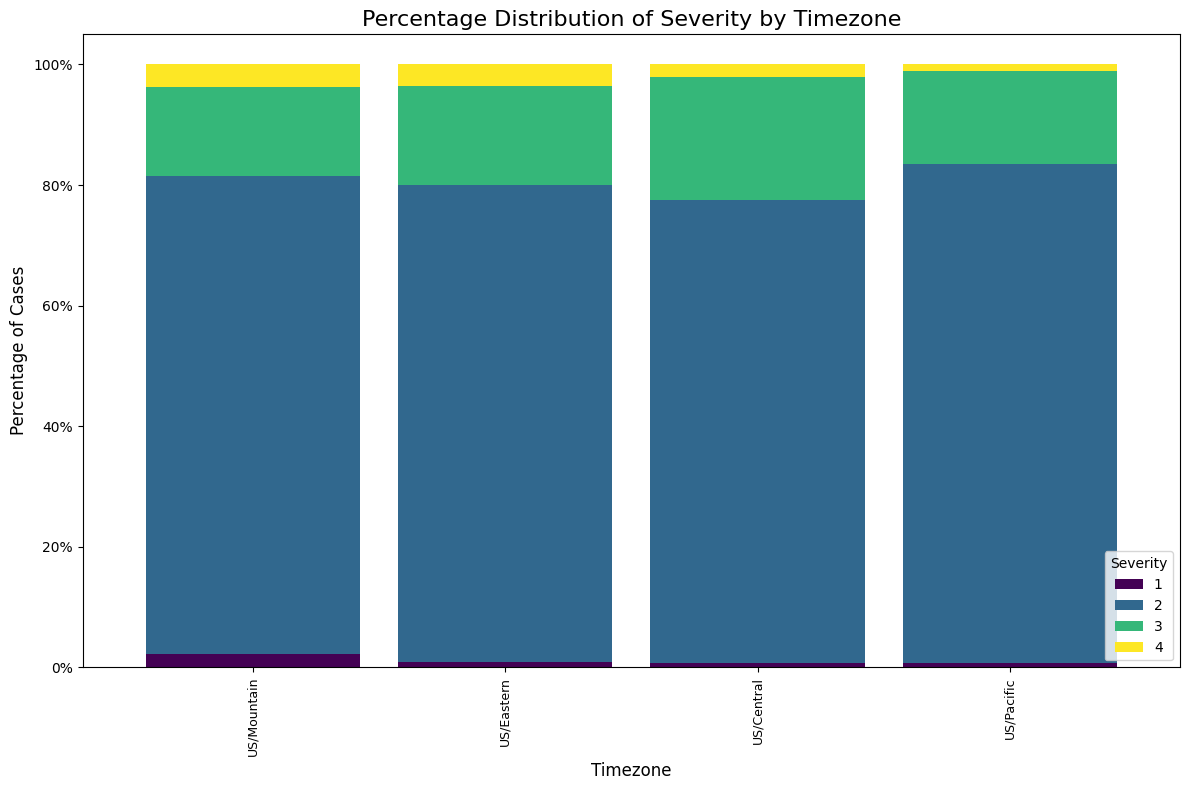


--- Plotting: Wind_Direction ---



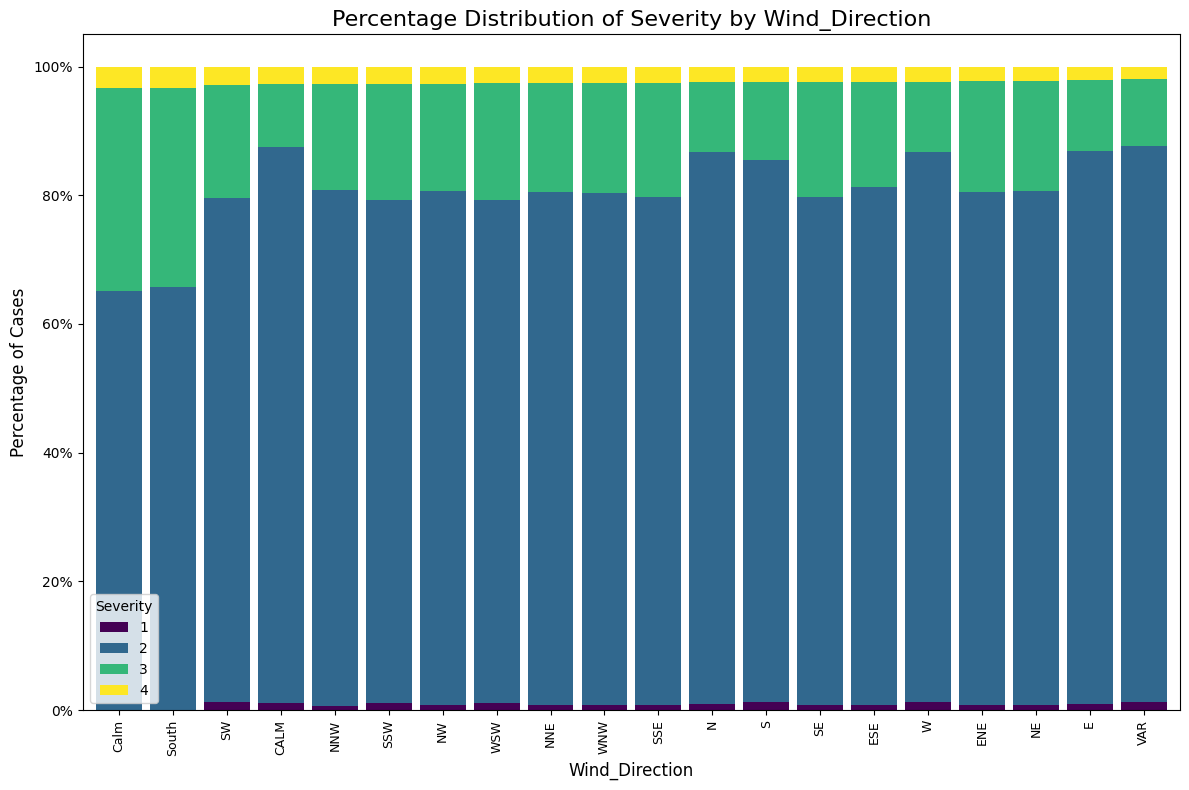


--- Plotting: Weather_Condition ---



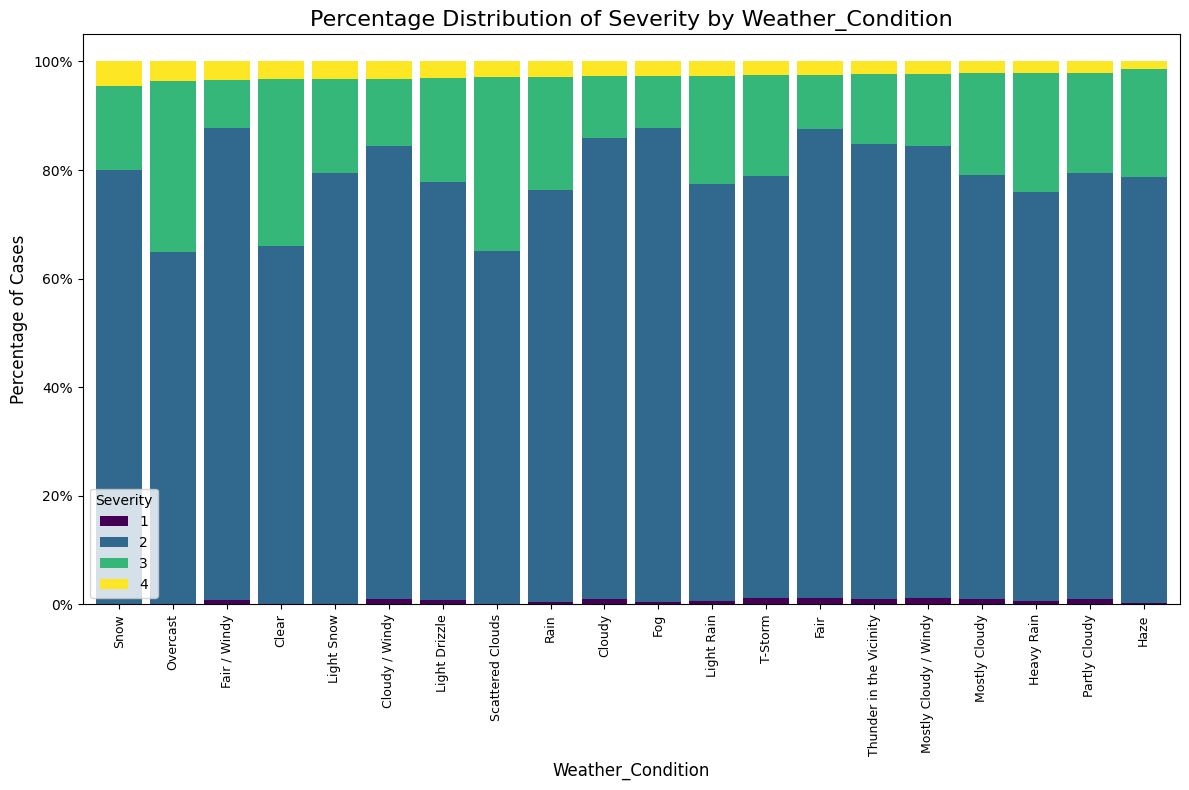


--- Plotting: Sunrise_Sunset ---



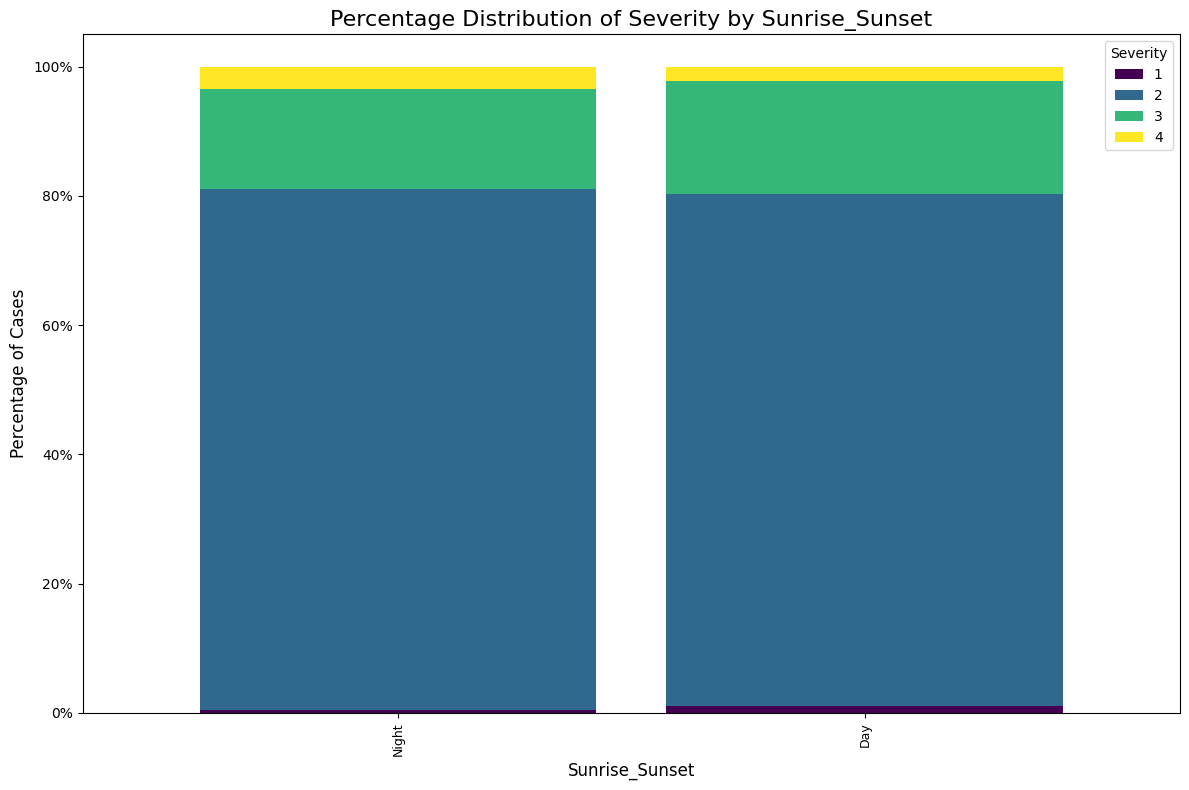


--- Plotting: Civil_Twilight ---



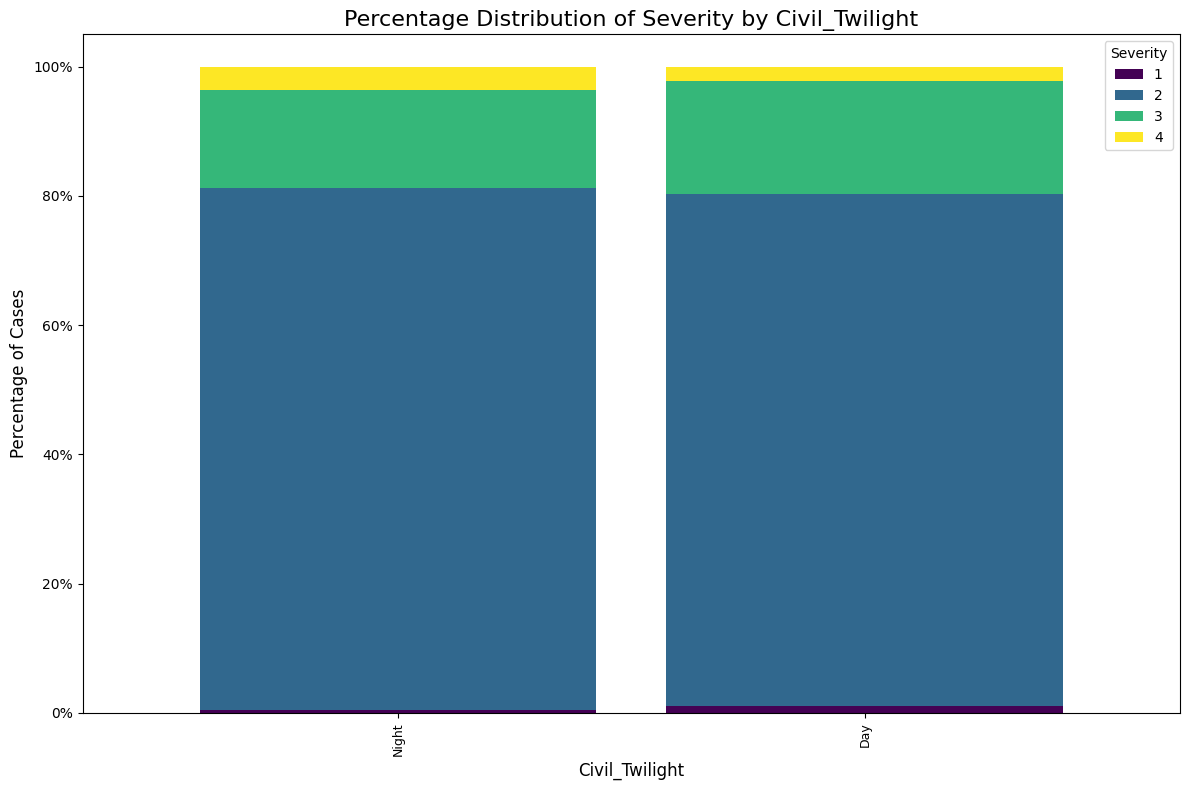


--- Plotting: Nautical_Twilight ---



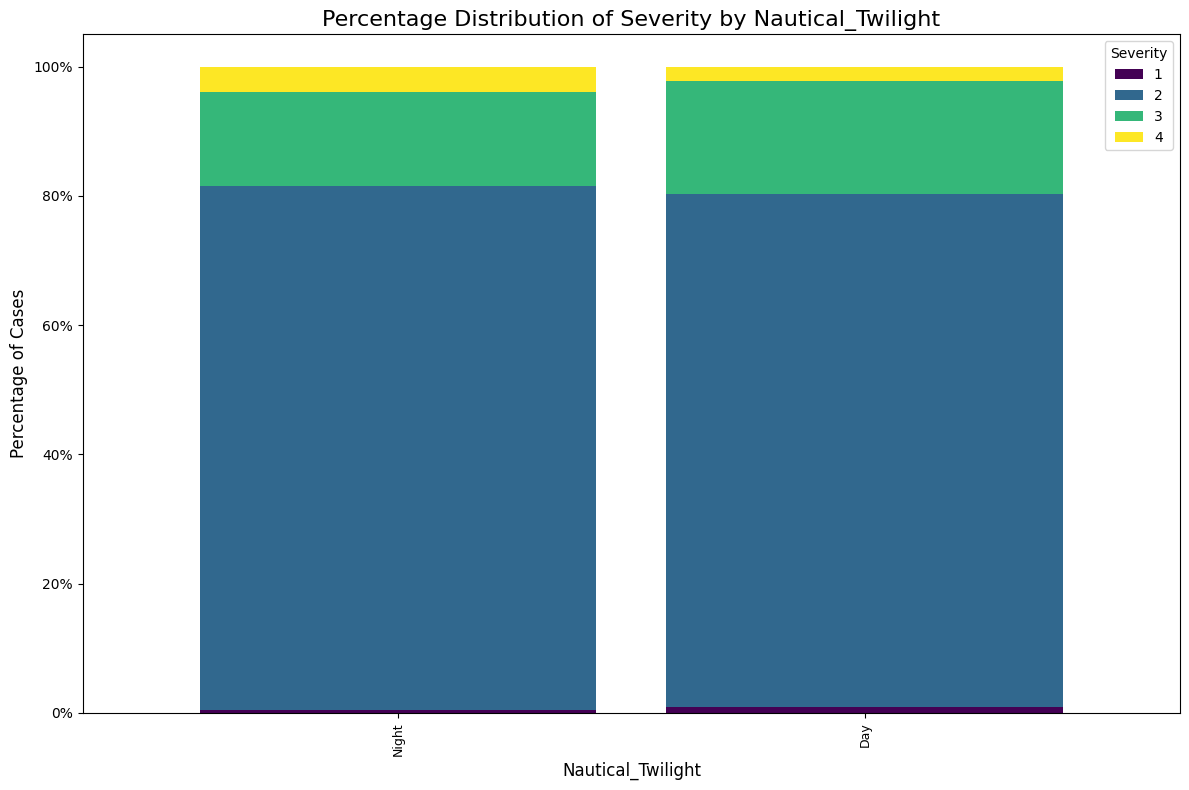


--- Plotting: Astronomical_Twilight ---



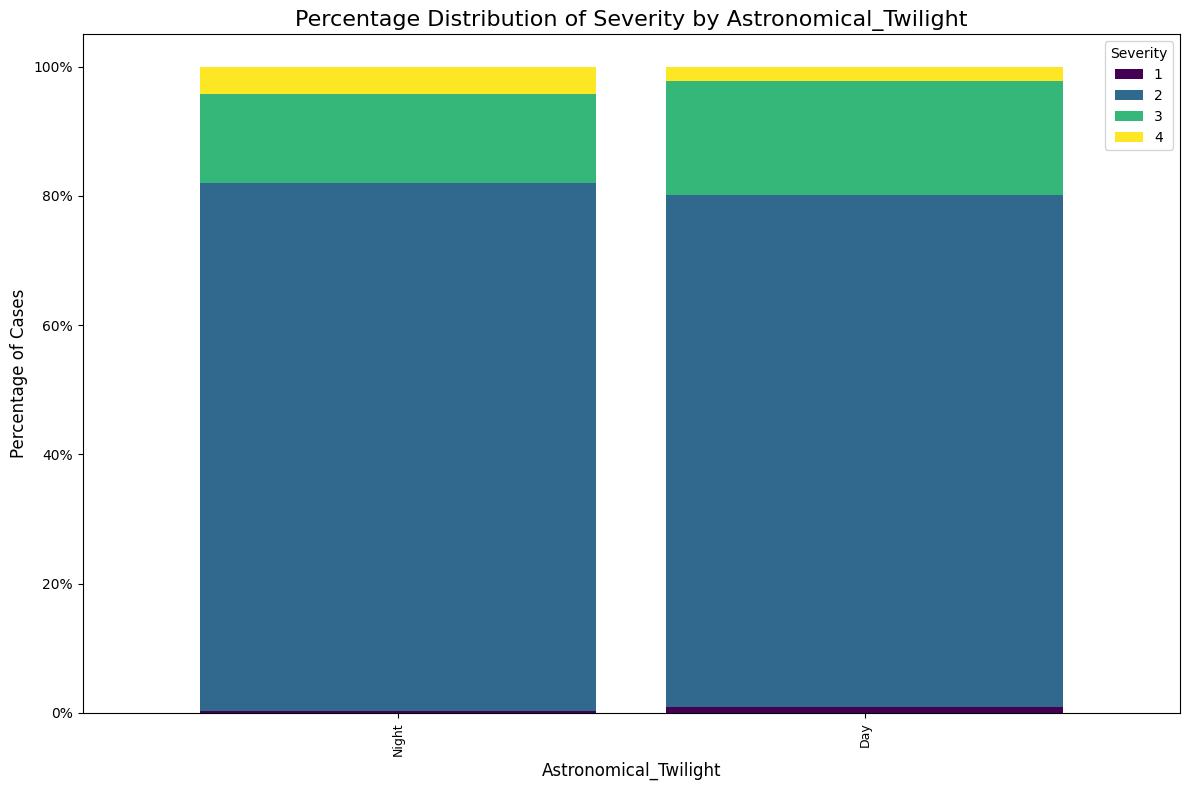

In [42]:
columns_to_plot = [
    'Street', 'City', 'County', 'State', 'Timezone', 'Wind_Direction',
    'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight',
    'Nautical_Twilight', 'Astronomical_Twilight'
]

for column in columns_to_plot:
    print(f"\n--- Plotting: {column} ---\n")
    plot_severity_distribution(df_transformed, group_by_column=column, top_n=20, percent=True, sort_by_severity_4=True)

_________
## Insights
* Many accidents occurred in areas lacking important road features such as bumps, crossings, give‑ways, junctions, exits, traffic calming measures, and traffic signals.

* The absence of these safety elements may be a major reason for the high number of incidents.

* Cities like Los Angeles and states like California and Texas report a large number of accidents in such areas.

* Missing safety features like traffic signals and traffic calming measures can make roads more dangerous.

* To reduce accidents, authorities should focus on improving road infrastructure by adding these missing features.

* Implementing these improvements could help lower accident rates and make roads safer for all users.
_________

____________
# Accident Hotspots
___________

In [43]:
import folium
from folium.plugins import HeatMap

# Sample a smaller subset for performance
sample_df = df_transformed[['Start_Lat', 'Start_Lng']].dropna().sample(n=10000)

# Create base map centered on the US
map_us = folium.Map(location=[37.0902, -95.7129], zoom_start=5)

# Add heatmap
HeatMap(data=sample_df.values, radius=8, blur=10).add_to(map_us)

# Save or display
map_us.save("accident_hotspots_map.html")
map_us 

__________
### Aggregate your data by city or region
_________

In [44]:
hotspots = df.groupby('City').size().reset_index(name='Accident_Count')
hotspots = hotspots.sort_values(by='Accident_Count', ascending=False)

In [45]:
top_hotspots = hotspots.head(10)
top_hotspots

,City,Accident_Count
5316,Miami,12160
3881,Houston,11030
4803,Los Angeles,10299
1425,Charlotte,8979
1985,Dallas,8245
6306,Orlando,6985
341,Austin,6269
6948,Raleigh,5553
5753,Nashville,4689
461,Baton Rouge,4625


In [46]:
low_hotspots = hotspots.tail(10)
low_hotspots

,City,Accident_Count
4207,Kelford,1
7877,Soddy-Daisy,1
4210,Kelliher,1
4212,Kelly,1
4215,Kemah,1
4216,Kemp,1
4219,Kendall,1
7870,Snowmass,1
4220,Kendrick,1
0,Aaronsburg,1


_________
# The COVID Time Period
_____________

* Studying accidents during the COVID‑19 period is very important because that period had unique patterns in travel behavior, traffic volume, and road safety that differed drastically from normal years.
____________

In [47]:
# Convert Start_Time 
df_transformed['Start_Time'] = pd.to_datetime(df_transformed['Start_Time'], errors='coerce')

# Filter COVID and Pre-COVID data
df_covid = df_transformed[df_transformed['Start_Time'] >= '2020-03-01']
df_pre_covid = df_transformed[df_transformed['Start_Time'] < '2020-03-01']

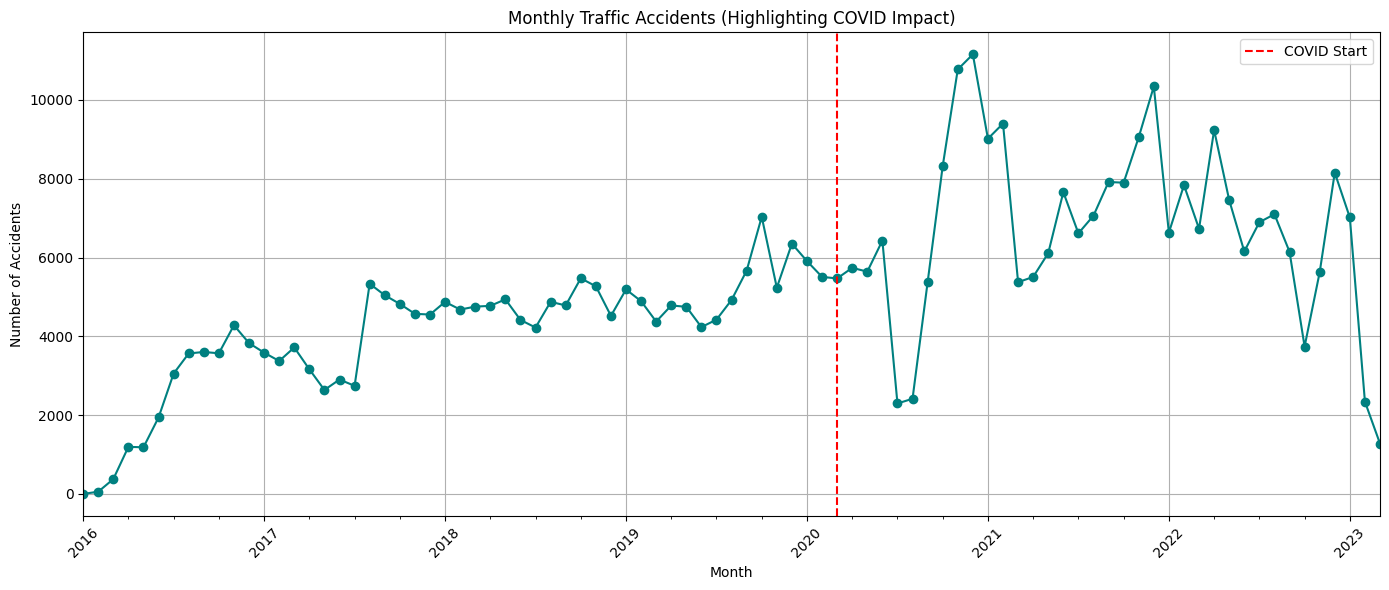

In [48]:
monthly_counts = df_transformed.groupby(df_transformed['Start_Time'].dt.to_period('M')).size()

plt.figure(figsize=(14,6))
monthly_counts.plot(marker='o', color='teal')
plt.axvline('2020-03', color='red', linestyle='--', label='COVID Start')
plt.title('Monthly Traffic Accidents (Highlighting COVID Impact)')
plt.ylabel('Number of Accidents')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [49]:
df_transformed['Period'] = df_transformed['Start_Time'].apply(lambda x: 'Pre-COVID' if x < pd.Timestamp('2020-03-01') else 'During COVID')

In [50]:
df_transformed['Period'].value_counts()

Period
During COVID    296038
Pre-COVID       203961
Name: count, dtype: int64

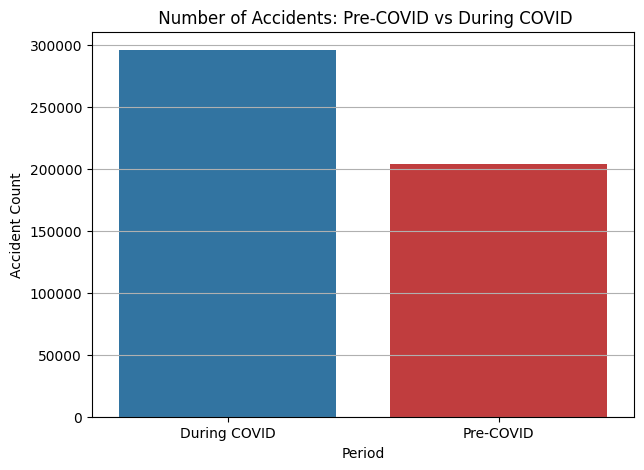

In [51]:
counts = df_transformed['Period'].value_counts()
plt.figure(figsize=(7,5))
sns.barplot(x=counts.index, y=counts.values, palette=colors)
plt.title(' Number of Accidents: Pre-COVID vs During COVID')
plt.ylabel('Accident Count')
plt.xlabel('Period')
plt.grid(axis='y')
plt.show()

________
## Why study accidents during the COVID period?

* Traffic patterns changed drastically due to lockdowns and work‑from‑home.

* Overall accidents dropped, but severe accidents sometimes increased.

* Empty roads led to more speeding and risky behavior.

* Emergency response times were affected.

* It helps compare pre‑COVID, during COVID, and post‑COVID trends.

* Insights guide future policies during disruptions.

* It helps identify new risk factors and long‑term changes.

* _________